# Signal Processing with Fast Fourier Transformation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.fft import rfft, rfftfreq
from scipy.fft import irfft
from scipy.io.wavfile import write
from audioplayer import AudioPlayer

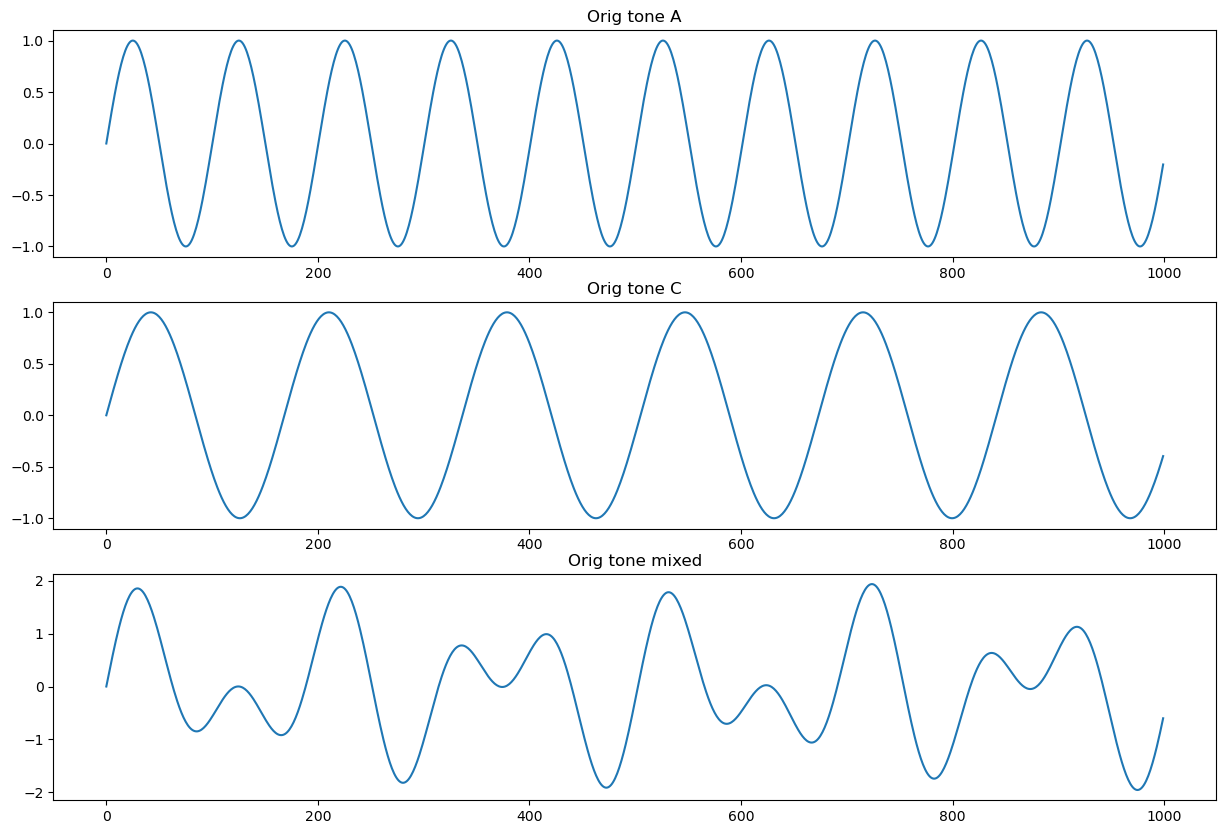

In [2]:
def generate_tone(freq, sampling_rate, time):
    x = np.linspace(0, time, sampling_rate * time, endpoint=False)
    y = np.sin((2 * np.pi) * x * freq)
    return x, y

#set parameters for signals
sampling_rate = 44100 # hertz
t = 2  # seconds
s = 1000 #for plotting only a subset

#generate sine wave tones
x, tone_A = generate_tone(440, sampling_rate, t)
x, tone_C = generate_tone(262, sampling_rate, t)

#addition of both signals
tone_mix = tone_A  + tone_C

#plotting
fig = plt.figure(figsize=(15, 10))
fig.add_subplot(3,1,1)
plt.plot(tone_A[:s])
plt.title("Orig tone A")
fig.add_subplot(3,1,2)
plt.plot(tone_C[:s])
plt.title("Orig tone C")
fig.add_subplot(3,1,3)
plt.plot(tone_mix[:s])
plt.title("Orig tone mixed")
plt.show()

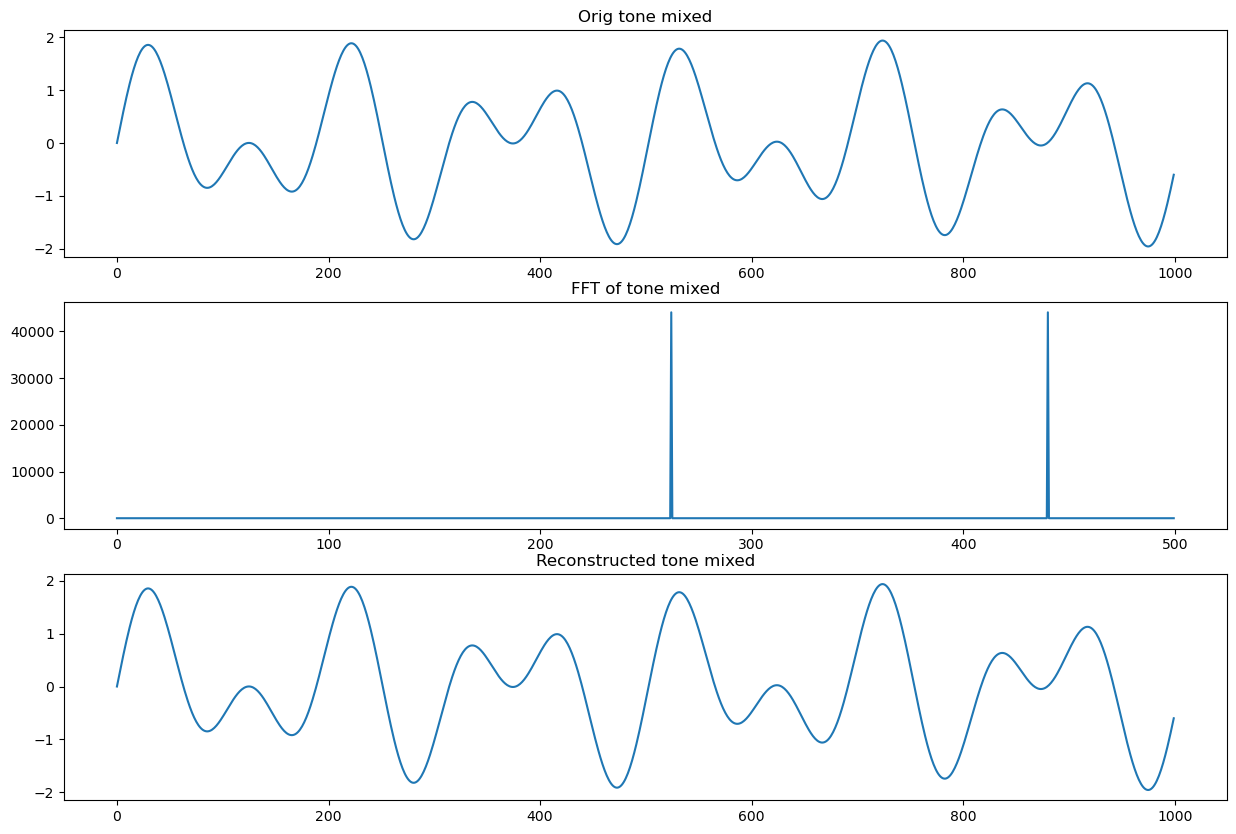

In [3]:
# Compute the fast Fourier transform (FFT) of the mixed signal 
yf = rfft(tone_mix)

# sample frequencies of FFT
N = sampling_rate * t
xf = rfftfreq(N, 1 / sampling_rate)

#Compute the inverse fast Fourier transform (IFFT)
reco_tone = irfft(yf)

#plotting
fig = plt.figure(figsize=(15, 10))
fig.add_subplot(3,1,1)
plt.plot(tone_mix[:s])
plt.title("Orig tone mixed")
fig.add_subplot(3,1,2)
plt.plot(xf[:s],np.abs(yf)[:s])
plt.title("FFT of tone mixed")
fig.add_subplot(3,1,3)
plt.plot(reco_tone[:s])
plt.title("Reconstructed tone mixed")
plt.show()

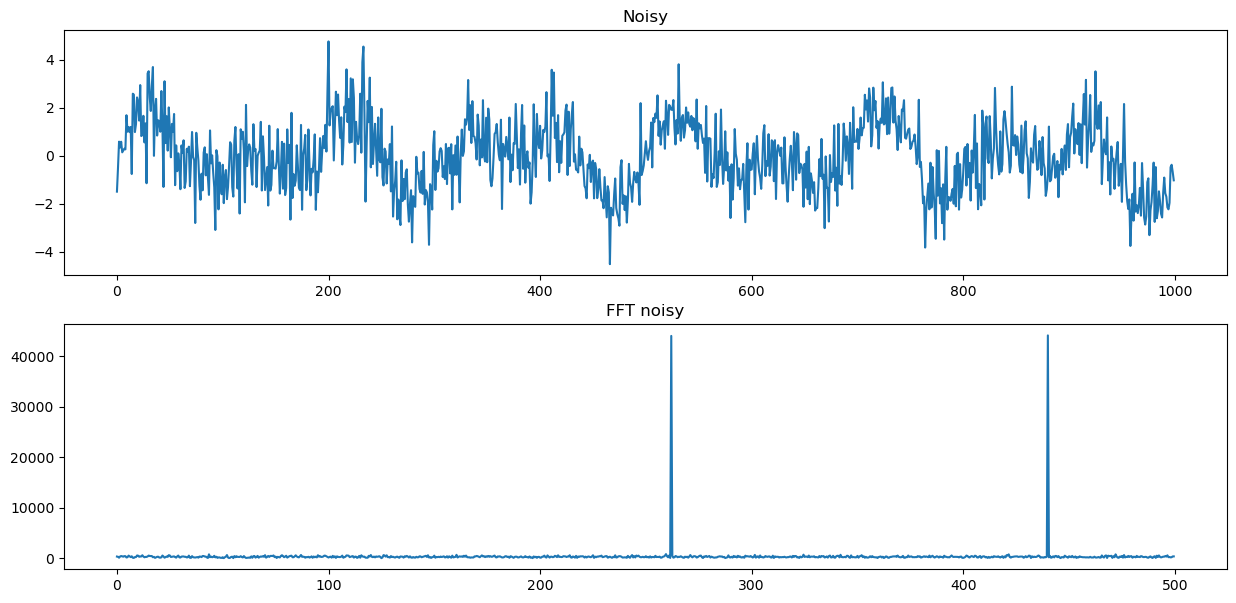

In [4]:
#add noise to the signal
tone_noisy = tone_mix + np.random.randn(len(x))

#save sounds to disk
norm_tone_mix = np.int16((tone_mix / tone_mix.max()) * 32767)
norm_tone_noisy = np.int16((tone_noisy / tone_noisy.max()) * 32767)
write("orig.wav", sampling_rate, norm_tone_mix)
write("noisy.wav", sampling_rate, norm_tone_noisy)

# compute the FFT of the noisy signal
yf = rfft(tone_noisy)

# Number of samples in normalized_tone
N = sampling_rate * t
xf = rfftfreq(N, 1 / sampling_rate)

#plotting
fig = plt.figure(figsize=(15, 7))
fig.add_subplot(2,1,1)
plt.plot(tone_noisy[:s])
plt.title("Noisy")
fig.add_subplot(2,1,2)
plt.plot(xf[:s], np.abs(yf)[:s])
plt.title("FFT noisy")
plt.show()

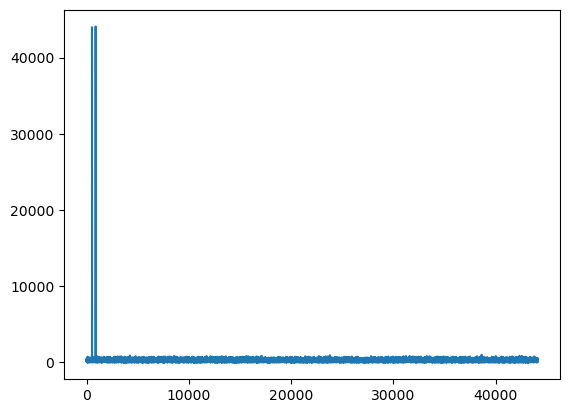

In [5]:
plt.plot(np.abs(yf))
#print(len(yf_hat))

C:\Users\sohan\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


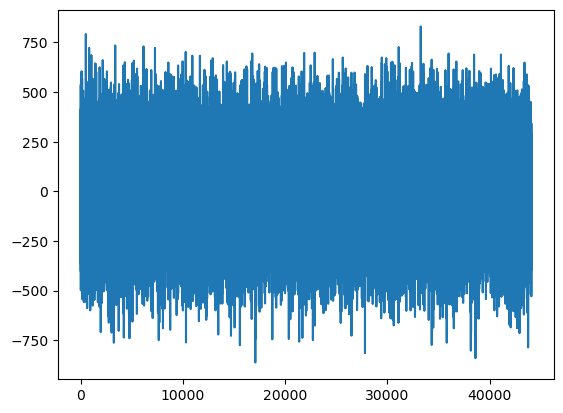

In [6]:
plt.plot(yf)

In [7]:
yf

array([-315.56821163  +0.j        ,  150.49913007+229.324826j  ,
          4.7785418  -84.21698863j, ..., -376.93349541+265.79189336j,
       -409.34898612-311.27104511j, -154.89551296  +0.j        ])

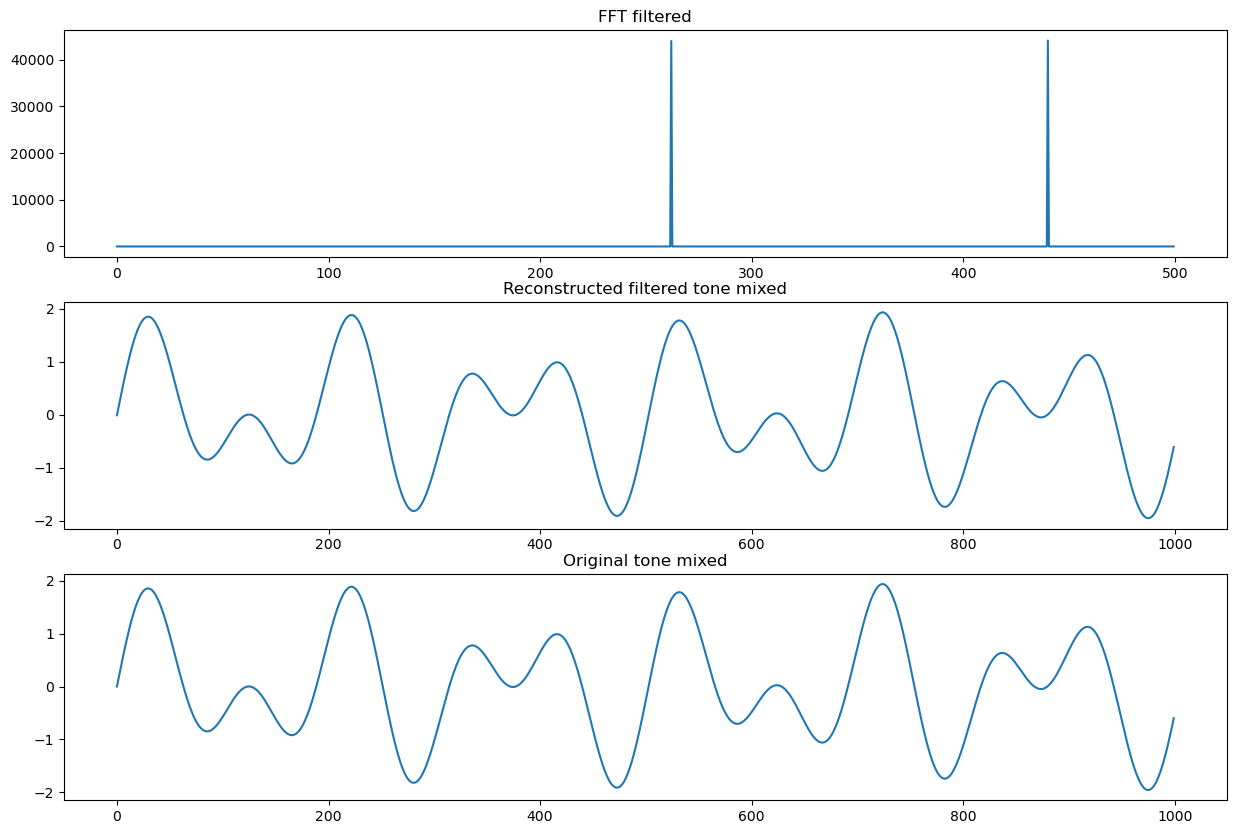

In [8]:
#filtering the noisy signal in the fourier domain: 
yf_hat = np.abs(yf)
#thresh = yf_hat.mean() + 3*yf_hat.std()
mask = yf_hat > 1500 #thresh
yf_clean = yf*mask

#compute the inverse fast Fourier transform
filtered_tone = irfft(yf_clean)

#store filtered tone to disk
norm_filtered_tone = np.int16(filtered_tone * (32767 / filtered_tone.max()))
write("clean.wav", sampling_rate, norm_filtered_tone)

#plotting
fig = plt.figure(figsize=(15, 10))
fig.add_subplot(3,1,1)
plt.plot(xf[:s], np.abs(yf_clean)[:s])
plt.title("FFT filtered")
fig.add_subplot(3,1,2)
plt.plot(filtered_tone[:s])
plt.title("Reconstructed filtered tone mixed")
fig.add_subplot(3,1,3)
plt.plot(tone_mix[:s])
plt.title("Original tone mixed")
plt.show()

In [9]:
#play the tone with added noise
AudioPlayer("noisy.wav").play(block=True)

In [10]:
#play the original tone
AudioPlayer("orig.wav").play(block=True)

In [11]:
#play the filtered tone
AudioPlayer("clean.wav").play(block=True)